<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **FINAL Assignment**


Import the libraries we need for the lab


In [40]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 

In [42]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

Read in the csv file from the URL using the request library


In [43]:
boston_df=pd.read_csv(boston_url)

Initially, we had used the t-test to test if there was a statistical difference in evaluations for males and females, we are now going to use regression. We will state the null hypothesis:

*   $H\_0: β1$ = 0 (Gender has no effect on teaching evaluation scores)
*   $H\_1: β1$ is not equal to 0 (Gender has an effect on teaching evaluation scores)


We will use the female variable. female = 1 and male = 0


In [44]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on gender. The coefficient -0.1680 means that females get 0.168 scores less than men.


### Regression with ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?


State the Hypothesis:

*   $H\_0: µ1 = µ2 = µ3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Then we group the data like we did with ANOVA


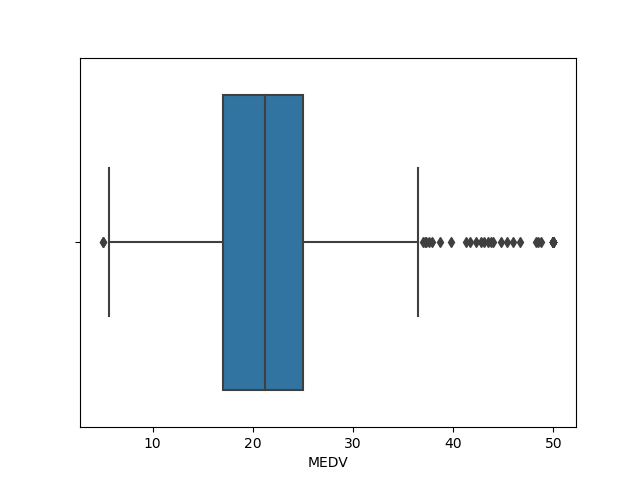

In [47]:
ax=sns.boxplot(x="MEDV" , data=boston_df)
plt.show()

Use OLS function from the statsmodel library


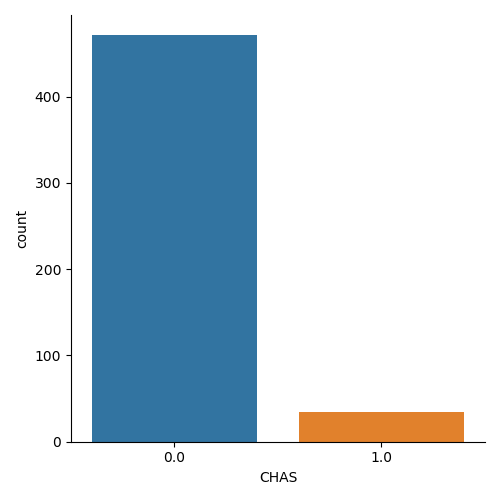

In [60]:
sns.catplot(x='CHAS',kind='count', data=boston_df)
plt.show()

**Conclusion:** We can also see the same values for ANOVA like before and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.


### Regression with ANOVA option 2


Create dummy variables - A dummy variable is a numeric variable that represents categorical data, such as gender, race, etc. Dummy variables are dichotomous, i.e they can take on only two quantitative values.


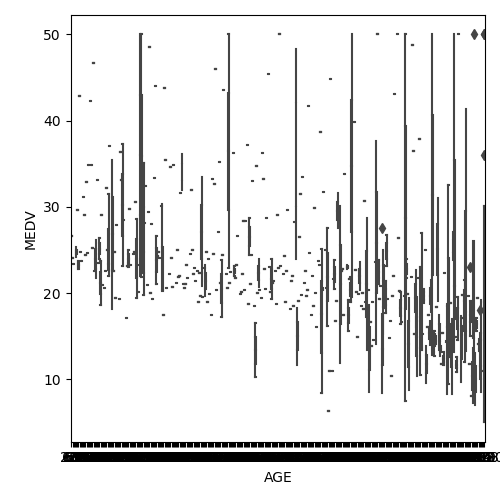

In [65]:
ax=sns.boxplot(x="AGE",y='MEDV' , data=boston_df)
plt.show()

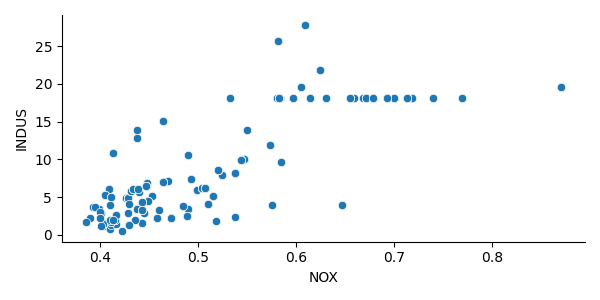

In [67]:
sns.relplot(x="NOX", y="INDUS", 
            
            data=boston_df, height = 3, aspect = 2)
plt.show()

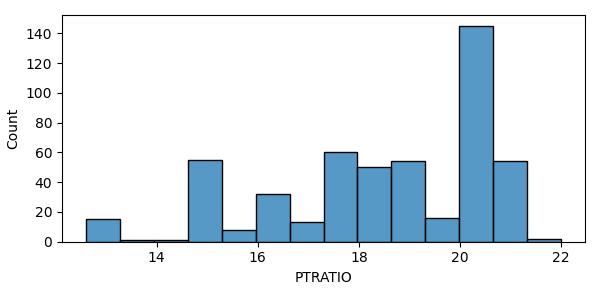

In [69]:
ax = sns.histplot(boston_df['PTRATIO'], kde = False)
plt.show()

### Correlation: Using the teachers' rating dataset, Is teaching evaluation score correlated with beauty score?


In [10]:
## X is the input variables (or independent variables)
X = ratings_df['beauty']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           4.25e-05
Time:                        13:46:44   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between beauty and evaluation scores


## Practice Questions


### Question 1: Using the teachers' rating data set, does tenure affect beauty scores?

*   Use α = 0.05


In [22]:
X=ratings_df['tenure']
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'ValueError'>: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Double-click **here** for a hint.

<!-- The hint is below:
## State Hypothesis
Null Hypothesis: Mean beauty scores for tenured and non-tenured instructors are equal
Alternative Hypothesis: There is a difference in mean beauty scores for tenured and non-tenured instructors

## use the dummy variable for tenure - the OLS library doesn't recognize texts
X = ratings_df['tenured_prof']
-->


Double-click **here** for the solution.

<!-- The answer is below:
## put beauty scores in a list
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
p-value is greater than 0.05, so we fail to reject the null hypothesis as there is no evidence that the mean difference of tenured and untenured instructors are different
-->


### Question 2: Using the teachers' rating data set, does being an English speaker affect the number of students assigned to professors?

*   Use "allstudents"
*   Use α = 0.05 and α = 0.1


In [27]:
## insert code here
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'ValueError'>: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Double-click **here** for a hint.

<!-- The hint is below:
## State Hypothesis
Null Hypothesis: Mean number of students assigned to native English speakers vs non-native English speakers are equal
Alternative Hypothesis: There is a difference in mean number of students assigned to native English speakers vs non-native English speakers

## Is the instructor a native English speaker - make sure to use the binary variable "English speaker"
X = ratings_df['English_speaker']
## You can use the students or all students variable
y = ratings_df['allstudents']
-->


Double-click **here** for the solution.

<!-- The answer is below:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

At α = 0.05, p-value is greater, we fail to reject the null hypothesis as there is no evidence that being a native English speaker or a non-native English speaker affects the number of students assigned to an instructor.
At α = 0.1, p-value is less, we reject the null hypothesis as there is evidence that there is a significant difference of mean number of students assigned to native English speakers vs non-native English speakers.
-->


### Question 3: Using the teachers' rating data set, what is the correlation between the number of students who participated in the evaluation survey and evaluation scores?

*   Use "students" variable


In [29]:
## insert code here
X = ratings_df['students']
y = ratings_df['eval']

Double-click **here** for a hint.

<!-- The hint is below:
## create a list of students and evaluation socres
X = ratings_df['students']
y = ratings_df['eval']
-->


Double-click **here** for the solution.

<!-- The rest of the answer is below:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

R-square is 0.001, R will be √0.001, correlation coefficient is 0.03 (close to 0). There is a very weak correlation between the number of students who participated in the evaluation survey and evaluation scores
-->


## Authors

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork956-2022-01-01)

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


<hr>

## <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
